<a href="https://colab.research.google.com/github/dcruzf/colab/blob/main/Exercicio_Econ_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economia Financeira

## Séries

### Ibovespa

O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como referência para investidores ao redor do mundo.

Reavaliado a cada quatro meses, o índice é resultado de uma carteira teórica de ativos. É composto pelas ações e units de companhias listadas na B3 que atendem aos critérios descritos na sua metodologia, correspondendo a cerca de 80% do número de negócios e do volume financeiro do nosso mercado de capitais.

Você pode investir no Ibovespa através dos produtos indexados ao índice, que são:

* ETF - Renda Variável
* **Futuro de Ibovespa**
* **Futuro Mini de Ibovespa**
* Opção sobre Ibovespa
* Operação Estruturada de Rolagem de Minicontrato de Ibovespa
* Operação Estruturada de Rolagem de Ibovespa
* Opção Flexível de Ibovespa
* Opção Flexível de BOVA11

### Contrato Futuro de Ibovespa [INV](https://br.investing.com/indices/ibovespa-futures)




<tbody><tr><td>Objeto de negociação</td><td>Ibovespa.</td></tr><tr><td>Código de negociação</td><td>IND</td></tr><tr><td>Tamanho do contrato</td><td>Contrato Futuro de Ibovespa multiplicado pelo valor em reais de cada ponto, sendo cada ponto equivalente a R$1,00.</td></tr><tr><td>Cotação</td><td>Pontos de índice.</td></tr><tr><td>Variação mínima de apregoação</td><td>5 pontos de índice.</td></tr><tr><td>Lote padrão</td><td>5 contratos.</td></tr><tr><td>Último dia de negociação</td><td>Quarta-feira mais próxima do dia 15 do mês de vencimento.</td></tr><tr><td>Data de vencimento</td><td>Quarta-feira mais próxima do dia 15 do mês de vencimento. Caso não haja sessão de negociação, a data de vencimento será a próxima sessão de negociação.</td></tr><tr><td>Meses de vencimento</td><td>Meses pares.</td></tr><tr><td>Liquidação no vencimento</td><td>Financeira.</td></tr></tr></tbody>

### Futuro Mini de Ibovespa [WIN](https://br.investing.com/indices/bovespa-win-futures)

<tbody><tr><td>Objeto de negociação</td><td>Ibovespa.</td></tr><tr><td>Código de negociação</td><td>WIN</td></tr><tr><td>Tamanho do contrato</td><td>Contrato Futuro de Ibovespa multiplicado pelo valor em reais de cada ponto sendo que, cada ponto será de R$0,20.</td></tr><tr><td>Cotação</td><td>Pontos de índice.</td></tr><tr><td>Variação mínima de apregoação</td><td>5 pontos de índice.</td></tr><tr><td>Lote padrão</td><td>1 contrato.</td></tr><tr><td>Último dia de negociação</td><td>Quarta-feira mais próxima do dia 15 do mês de vencimento.</td></tr><tr><td>Data de vencimento</td><td>Quarta-feira mais próxima do dia 15 do mês de vencimento. Caso não houver sessão de negociação, a data de vencimento será a próxima sessão de negociação.</td></tr><tr><td>Meses de vencimento</td><td>Meses pares.</td></tr><tr><td>Liquidação no vencimento</td><td>Financeira.</td></tr><tr id="specificationList"><td style="background-color: #f2f2f2;border-right: thin solid #e5e5e5;min-width: 185px;">Contrato</td><td><div class="list-avatar" style="margin-bottom:0"><div class="list-avatar-row">	<div class="primary-action">		<img src="/lumis-theme/br/com/bvmf/internet/theme/bvmf-internet/img/ic_cloud_download_black_48dp.png" alt="">	</div>	<div class="content">		<p class="primary-text"><a href="http://www.bmfbovespa.com.br/lumis/portal/file/fileDownload.jsp?fileId=8A828D2951C9C377015221CF257F5253">Contrato Futuro Mini de Ibovespa</a></p>	</div></div></div></td></tr></tbody>

### Pacotes e funções

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


##### Instalação e importação de pacotes

In [ ]:
!pip install -U statsmodels >> null
!pip install arch >> null
exit(0)

In [ ]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import q_stat

from arch import arch_model
import arch
import arch.unitroot

##### Funções

In [ ]:
def to_date(df):
  return df.assign(Date = pd.to_datetime(df.Date, format='%d.%m.%Y'))

def read_data():
  WIN = (pd.read_csv('/gdrive/My Drive/Data/B3/FuturosMini.csv', usecols=[0,1])
         .rename(columns={'Data': 'Date', 'Último': 'WIN'})
         .pipe(to_date)
         .set_index('Date')
         .iloc[:,0]
         .str.replace('.', '')
         .str.replace(r',', '.')
         .astype('float64'))

  IND1 = (pd.read_csv('/gdrive/My Drive/Data/B3/FuturosIbovespa1.csv', usecols=[0,1])
          .rename(columns={'Data': 'Date', 'Último': 'IND'})
          .pipe(to_date)
          .set_index('Date'))
        
  IND2 = (pd.read_csv('/gdrive/My Drive/Data/B3/FuturosIbovespa2.csv', usecols=[0,1])
          .rename(columns={'Data': 'Date', 'Último': 'IND'})
          .pipe(to_date)
          .set_index('Date'))

  IND = pd.concat([IND1, IND2]).iloc[:, 0] *1000

  IBOV = (pd.read_csv('/gdrive/My Drive/Data/B3/IndiceBovespa.csv', usecols=[0,1])
          .rename(columns={'Data': 'Date', 'Último': 'IBOV'})
          .pipe(to_date)
          .set_index('Date')
          .iloc[:,0]
          .str.replace('.', '')
          .str.replace(r',', '.')
          .astype('float64'))

  df = pd.concat([IBOV, IND, WIN], axis=1, join='inner').sort_index()
  return df

def tsplot(y, lags=None, figsize=(10, 10), style='bmh', qq_title="QQ plot"):
   
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(y.name)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title(qq_title)
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
        plt.show()
    return None


def plot(df, title=''):
  plt.figure(figsize=[20,8])
  plt.subplot(311)
  plt.title(title)
  df.IBOV.plot()
  plt.legend()
  plt.subplot(312)
  df.IND.plot()
  plt.legend()
  plt.subplot(313)
  df.WIN.plot()
  plt.tight_layout()
  plt.legend()
  plt.show()
  
def qstat_plot(series, nlags=100):
  acf, qstat, pvalues = sm.graphics.tsa.acf(series, qstat=True, nlags=nlags)
  plt.plot(pvalues, 'o', label='p-values')
  plt.hlines(0.05, -1, nlags+1, alpha=.2, label='5%')
  plt.xlim(0,nlags)
  plt.xlabel('Ljung-Box Q statistics - p-values\n$H_0$:  The data are independently distributed\n$H_1$: The data exhibit serial correlation')
  plt.legend()
  return None

def plot_urq(series):
  plt.figure (figsize=(8,4))
  plt.plot(series);
  if series.name:
    plt.title(series.name)
  plt.xlabel(ADF(series));
  plt.show()
  return None

def ADF(series):
  adf, pvalue, critical, store = adfuller(series, maxlag=40, store=True)
  a = "Augmented Dickey-Fuller \nADF stats: {:.2f} p-value: {:.2f}\n".format(adf, pvalue)
  b = '1%: {1%:.2f} 5%: {5%:.2f} 10%: {10%:.2f}\n$H_0:  \phi-1 = 0$\n$H_1: \phi-1 < 0$'.format(**critical)
  return a + b

def gridsearchARIMA(series, p_max, q_max):
  results = pd.DataFrame()
  for p in range(p_max+1):
    for q in range(q_max+1):
      mod = ARIMA(series, (p, 1, q))
      try:
        res = mod.fit(disp=False)
        model = "ARIMA({}, 1, {})".format(res.k_ar, res.k_ma)
        results.loc[model, 'AIC'] = res.aic
        results.loc[model, 'BIC'] = res.bic
        results.loc[model, 'LogLikelihood'] = res.llf
        results.loc[model, 'model'] = res
      except:
        pass
        #print('Erro no modelo ARIMA({}, 1, {})'.format(p,q))
  return results.sort_values('AIC')

def acf_pacf(series):
  fig, axes = plt.subplots(1, 2, figsize=(15,4))
  fig = sm.graphics.tsa.plot_acf(series, lags=40, ax=axes[0])
  fig = sm.graphics.tsa.plot_pacf(series, lags=40, ax=axes[1])
  axes[0].set_title('ACF ' + series.name)
  axes[1].set_title('PACF ' + series.name)
  return plt.show()

def JB(series):
  from statsmodels.stats.stattools import jarque_bera
  result = jarque_bera(series)
  return "\nJarque-Bera {:.2f} - p-value {:.2f} \nSkewness: {:.2f} - Kurtosis: {:.2f} ".format(result[0], result[1], result[2], result[3])

def norm_tests (series):
  from scipy.stats import norm
  
  ax = sns.distplot(series, fit=norm, hist_kws = {"label":series.name}, fit_kws={'label':'Normal', 'color':'red'})
  ax.set_title(JB(series))
  ax.legend()

### Dados



In [ ]:
try:
  df = pd.read_pickle('/gdrive/My Drive/Data/B3/dataframe.pkl')
  
except:
  df = read_data()
  df.to_pickle('/gdrive/My Drive/Data/B3/dataframe.pkl')
  
df.head()

,IBOV,IND,WIN
Date,,,
2005-02-18,26756.25,27223.0,27223.0
2005-02-21,26853.05,27297.0,27297.0
2005-02-22,26740.06,26988.0,26988.0
2005-02-23,27198.46,27488.0,27488.0
2005-02-24,28436.17,28843.0,28800.0


In [ ]:
df.to_csv('work.csv')

In [ ]:
df_month = df.resample("M").apply(lambda x: x[x.index.max()])
df_logreturn = np.log(df).diff(axis=0).dropna() * 100
df_logreturn_month = np.log(df_month).diff(axis=0).dropna() * 100

### Teste de normalidade, outliers, correlações

#### Diário

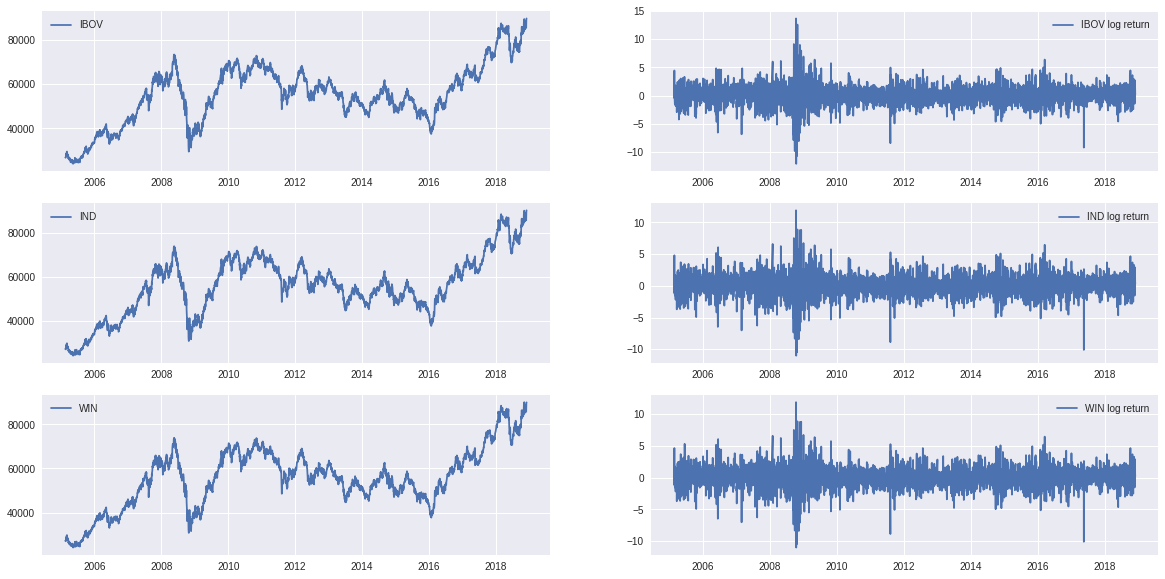

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))
for n, col in enumerate(df.columns):
  axes[n, 0].plot(df[col], label = col)
  axes[n, 0].legend()
  axes[n, 1].plot(df_logreturn[col], label = col + ' log return')
  axes[n, 1].legend()


Teste Jarque-Bera

$H_0:$ Segue uma distribuição normal

$H_1:$ Não segue uma distribuição normal
$${\mathit  {JB}}={\frac  {n-k+1}{6}}\left(S^{2}+{\frac  14}(C-3)^{2}\right)$$

Onde, 
$$S={\frac  {{\hat  {\mu }}_{3}}{{\hat  {\sigma }}^{3}}}={\frac  {{\frac  1n}\sum _{{i=1}}^{n}(x_{i}-{\bar  {x}})^{3}}{\left({\frac  1n}\sum _{{i=1}}^{n}(x_{i}-{\bar  {x}})^{2}\right)^{{3/2}}}}$$
e 

$${\displaystyle C={\frac {{\hat {\mu }}_{4}}{{\hat {\sigma }}^{4}}}={\frac {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{4}}{\left({\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\right)^{2}}}} $$


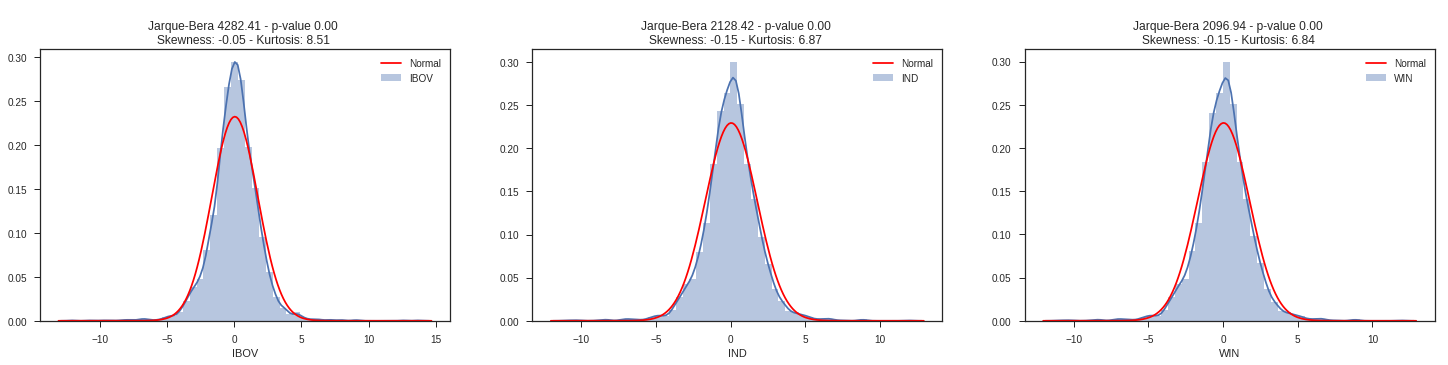

In [ ]:
sns.set(style="ticks")
plt.figure(figsize=[25,5])

plt.subplot(131)
norm_tests(df_logreturn.IBOV)
plt.subplot(132)
norm_tests(df_logreturn.IND)
plt.subplot(133)
norm_tests(df_logreturn.WIN)

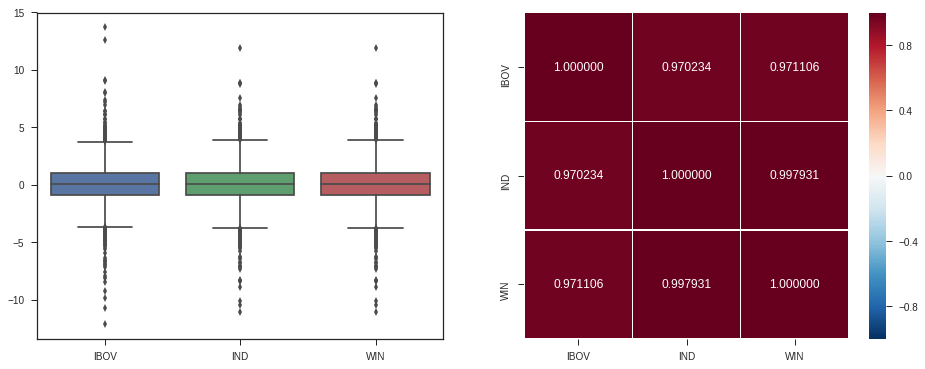

In [ ]:
plt.figure(figsize=[16,6])

plt.subplot(121)
sns.boxplot(data=df_logreturn);
plt.subplot(122)
sns.heatmap(df_logreturn.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt=".6f");

#### Mensal

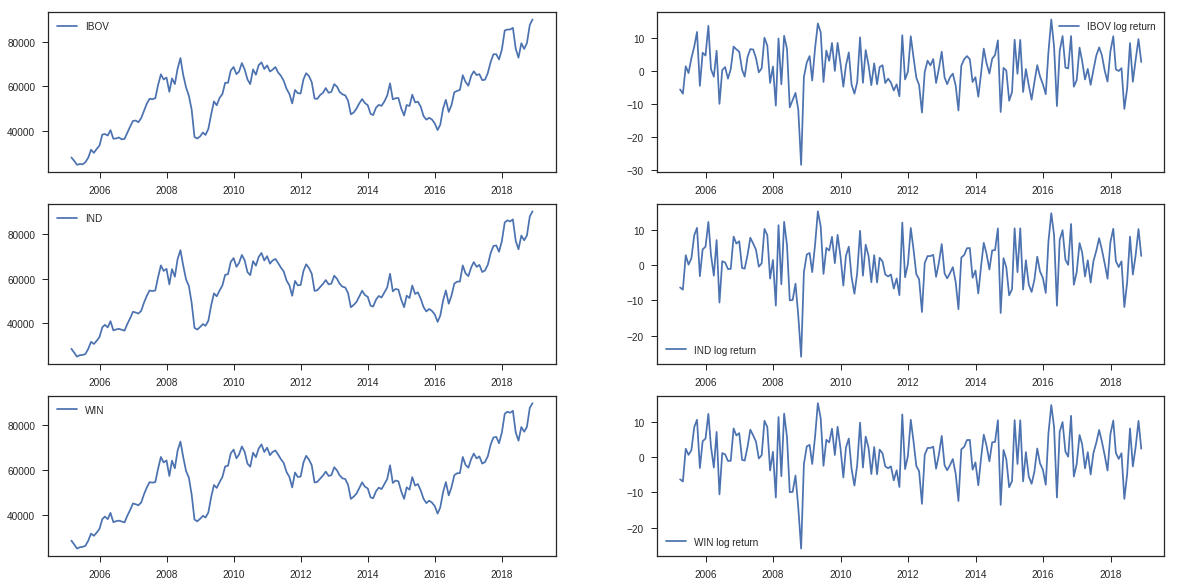

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))
for n, col in enumerate(df.columns):
  axes[n, 0].plot(df_month[col], label = col)
  axes[n, 0].legend()
  axes[n, 1].plot(df_logreturn_month[col], label = col + ' log return')
  axes[n, 1].legend()


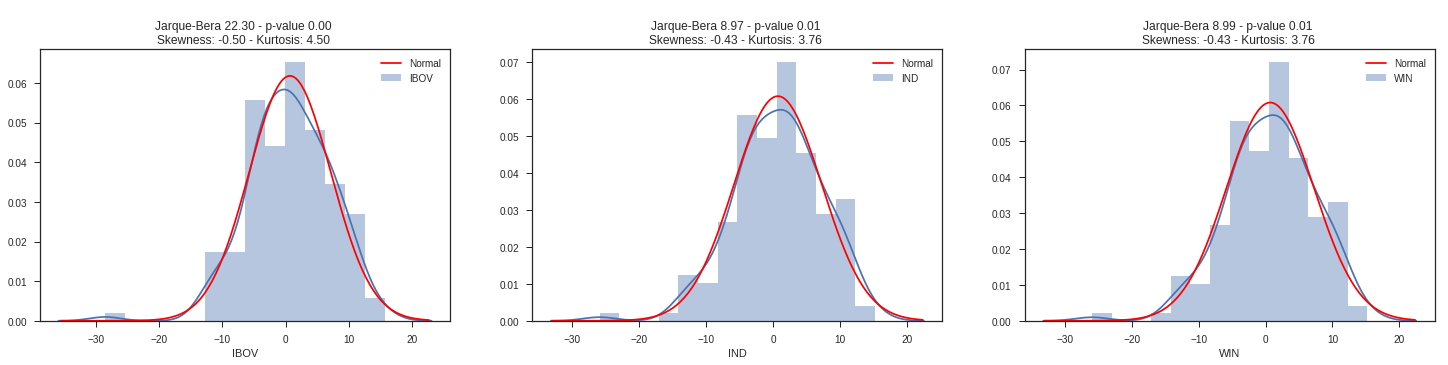

In [ ]:
plt.figure(figsize=[25,5])

plt.subplot(131)
norm_tests(df_logreturn_month.IBOV)
plt.subplot(132)
norm_tests(df_logreturn_month.IND)
plt.subplot(133)
norm_tests(df_logreturn_month.WIN)


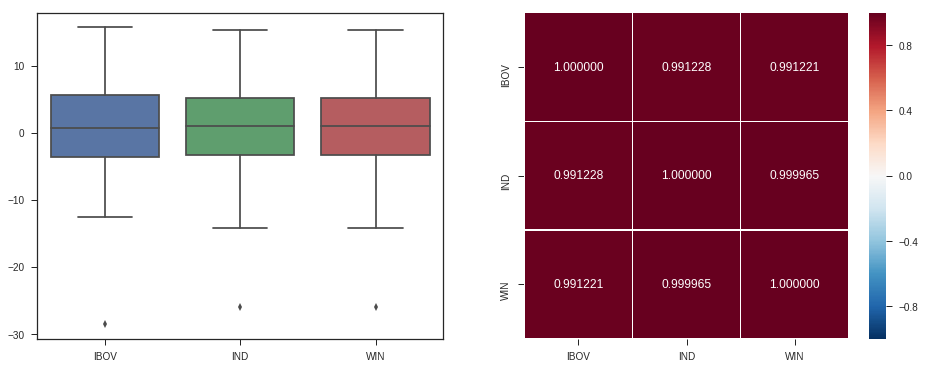

In [ ]:
plt.figure(figsize=[16,6])

plt.subplot(121)
sns.boxplot(data=df_logreturn_month);
plt.subplot(122)
sns.heatmap(df_logreturn_month.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, fmt=".6f");

### Modelo da média

#### Diário

##### IBOV

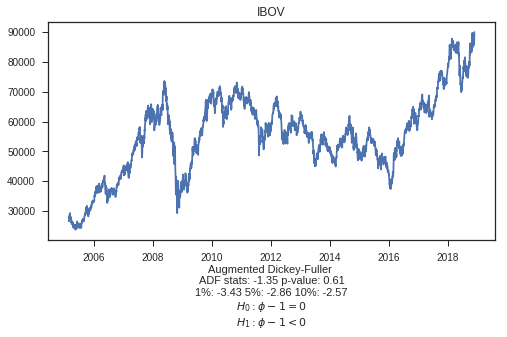

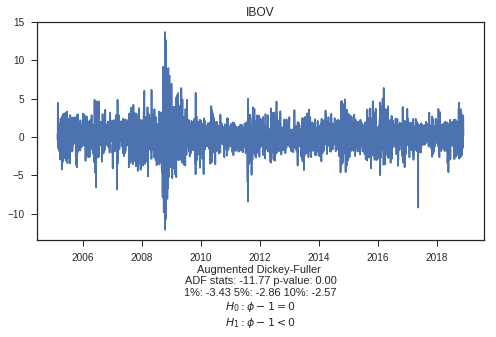

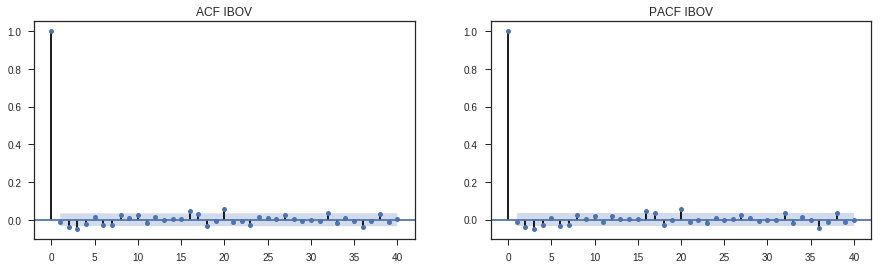

In [ ]:
plot_urq(df.IBOV)
plot_urq(df_logreturn.IBOV)
acf_pacf(df_logreturn.IBOV)

In [ ]:
print(arch.unitroot.ADF(df_logreturn.IBOV))
print(arch.unitroot.KPSS(df_logreturn.IBOV))
print(arch.unitroot.PhillipsPerron(df_logreturn.IBOV))

   Augmented Dickey-Fuller Results   
Test Statistic                -11.772
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.105
P-value                         0.562
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -59.115
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null 

In [ ]:
result_IBOV = gridsearchARIMA(np.log(df.IBOV), 4, 4)
result_IBOV.iloc[:, :3]

,AIC,BIC,LogLikelihood
"ARIMA(4, 1, 3)",-17940.901184,-17885.749229,8979.450592
"ARIMA(4, 1, 4)",-17940.107303,-17878.827353,8980.053652
"ARIMA(0, 1, 4)",-17930.062800,-17893.294829,8971.031400
"ARIMA(2, 1, 1)",-17930.006201,-17899.366226,8970.003101
"ARIMA(3, 1, 1)",-17929.447000,-17892.679030,8970.723500
"ARIMA(0, 1, 3)",-17929.404762,-17898.764786,8969.702381
"ARIMA(4, 1, 0)",-17929.037035,-17892.269065,8970.518517
"ARIMA(3, 1, 0)",-17928.510595,-17897.870620,8969.255298
"ARIMA(4, 1, 1)",-17927.577775,-17884.681810,8970.788887
"ARIMA(3, 1, 2)",-17927.461202,-17884.565237,8970.730601


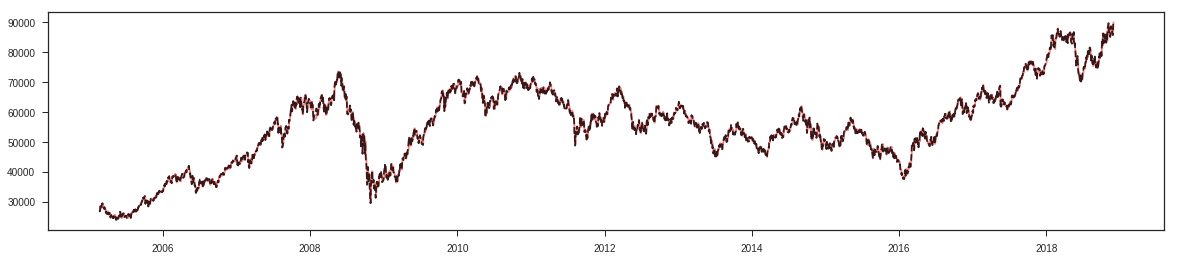

In [ ]:
res = result_IBOV.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'r', alpha=.5)
plt.plot(df.IBOV, '--k', alpha=.8);

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.IBOV   No. Observations:                 3388
Model:                 ARIMA(4, 1, 3)   Log Likelihood                8979.451
Method:                       css-mle   S.D. of innovations              0.017
Date:                Fri, 22 Feb 2019   AIC                         -17940.901
Time:                        19:33:29   BIC                         -17885.749
Sample:                             1   HQIC                        -17921.186
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      1.412      0.158      -0.000       0.001
ar.L1.D.IBOV     0.3384      0.131      2.576      0.010       0.081       0.596
ar.L2.D.IBOV    -0.8029      0.050    -15.96

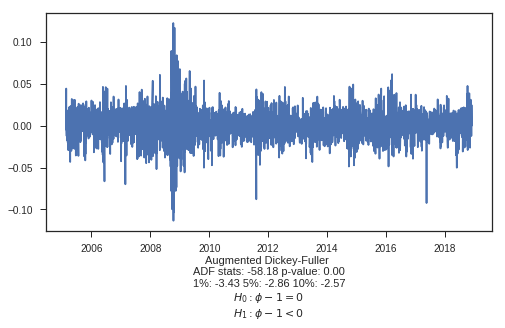

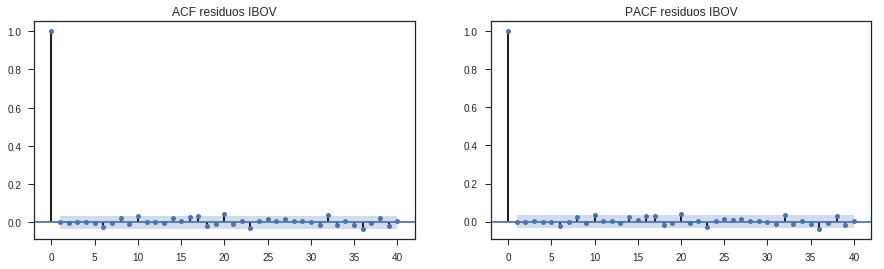

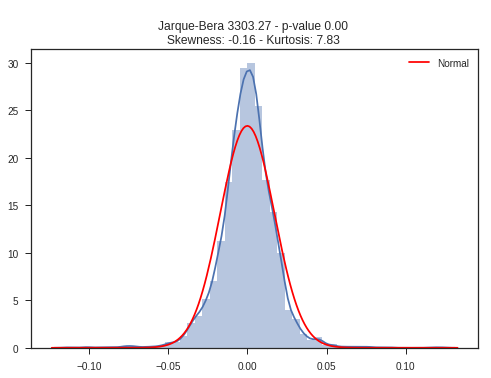

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos IBOV'))
norm_tests(res.resid)

In [ ]:
print(arch.unitroot.ADF(res.resid))
print(arch.unitroot.KPSS(res.resid))
print(arch.unitroot.PhillipsPerron(res.resid))

   Augmented Dickey-Fuller Results   
Test Statistic                -58.178
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.108
P-value                         0.547
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -58.285
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null 

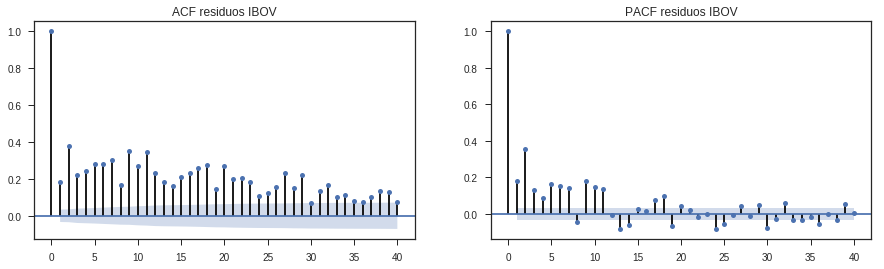

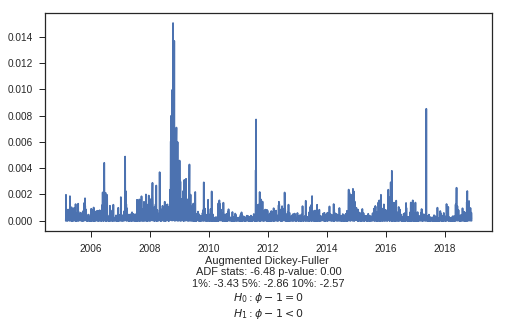

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos IBOV'))
plot_urq(res.resid**2)
resid_IBOV = res.resid

In [ ]:
print(arch.unitroot.ADF(res.resid**2))
print(arch.unitroot.KPSS(res.resid**2))
print(arch.unitroot.PhillipsPerron(res.resid**2))

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.256
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.617
P-value                         0.020
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -76.209
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null 

##### IND

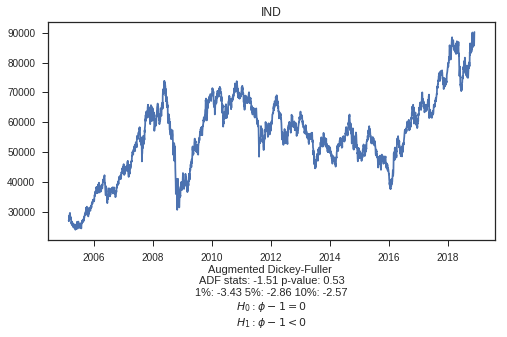

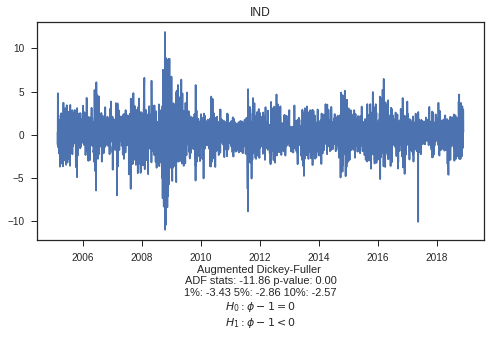

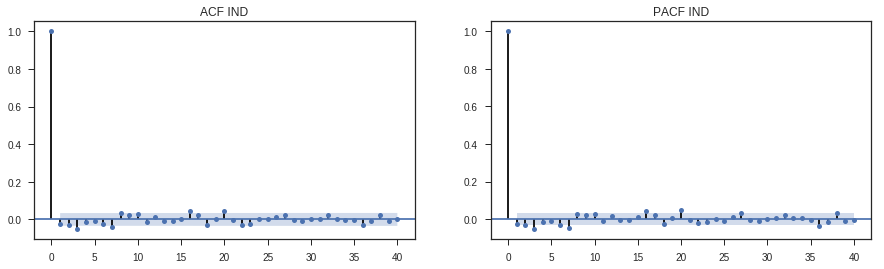

In [ ]:
plot_urq(df.IND)
plot_urq(df_logreturn.IND)
acf_pacf(df_logreturn.IND)

In [ ]:
print(arch.unitroot.ADF(df_logreturn.IND))
print(arch.unitroot.KPSS(df_logreturn.IND))
print(arch.unitroot.PhillipsPerron(df_logreturn.IND))

   Augmented Dickey-Fuller Results   
Test Statistic                -11.856
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.102
P-value                         0.575
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -59.808
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null 

In [ ]:
result_IND = gridsearchARIMA(np.log(df.IND), 4, 4)
result_IND.iloc[:, :3]

,AIC,BIC,LogLikelihood
"ARIMA(3, 1, 3)",-17861.349488,-17812.325528,8938.674744
"ARIMA(4, 1, 3)",-17860.649486,-17805.497531,8939.324743
"ARIMA(4, 1, 4)",-17860.469449,-17799.189498,8940.234724
"ARIMA(3, 1, 2)",-17848.266224,-17805.370259,8931.133112
"ARIMA(0, 1, 3)",-17847.578329,-17816.938354,8928.789165
"ARIMA(3, 1, 1)",-17847.228012,-17810.460042,8929.614006
"ARIMA(2, 1, 1)",-17847.156382,-17816.516407,8928.578191
"ARIMA(0, 1, 4)",-17846.846874,-17810.078903,8929.423437
"ARIMA(4, 1, 2)",-17846.839393,-17797.815432,8931.419696
"ARIMA(3, 1, 0)",-17846.357563,-17815.717588,8928.178782


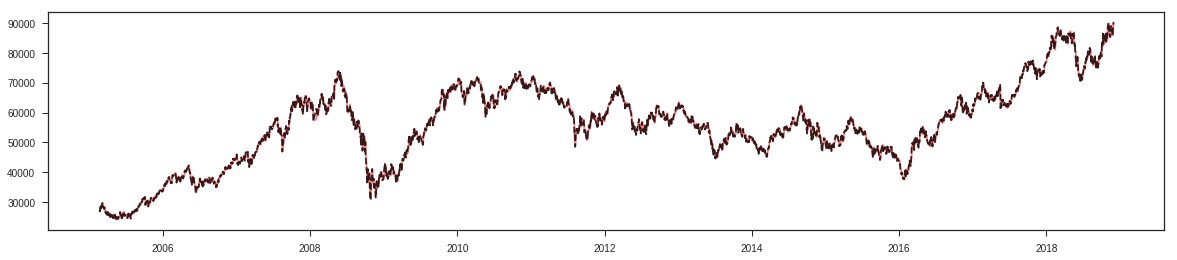

In [ ]:
res = result_IND.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'r', alpha=.5)
plt.plot(df.IND, '--k', alpha=.8);

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.IND   No. Observations:                 3388
Model:                 ARIMA(3, 1, 3)   Log Likelihood                8938.675
Method:                       css-mle   S.D. of innovations              0.017
Date:                Fri, 22 Feb 2019   AIC                         -17861.349
Time:                        19:35:09   BIC                         -17812.326
Sample:                             1   HQIC                        -17843.824
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      1.392      0.164      -0.000       0.001
ar.L1.D.IND     0.3776      0.089      4.250      0.000       0.203       0.552
ar.L2.D.IND    -0.7397      0.034    -21.449    

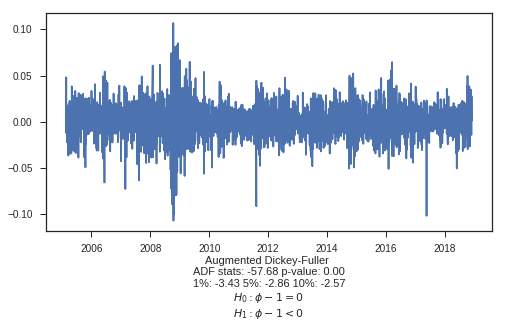

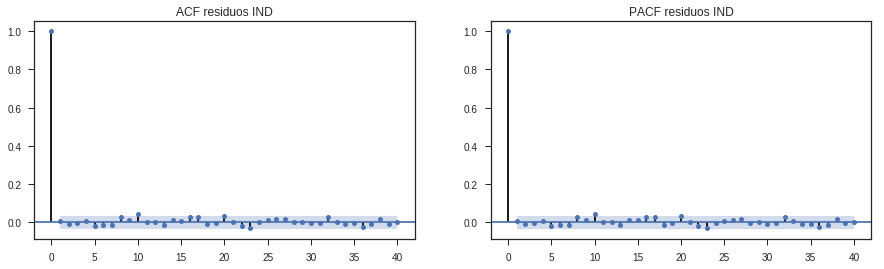

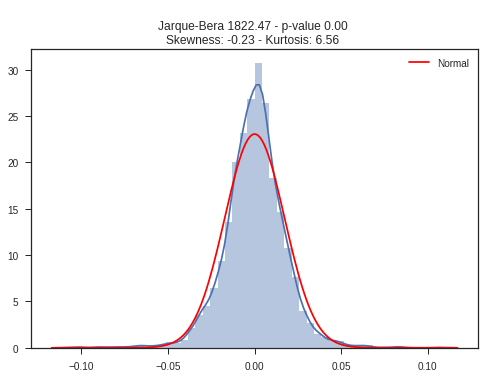

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos IND'))
norm_tests(res.resid)

In [ ]:
print(arch.unitroot.ADF(df_logreturn.IND))
print(arch.unitroot.KPSS(df_logreturn.IND))
print(arch.unitroot.PhillipsPerron(df_logreturn.IND))

   Augmented Dickey-Fuller Results   
Test Statistic                -11.856
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.102
P-value                         0.575
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -59.808
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null 

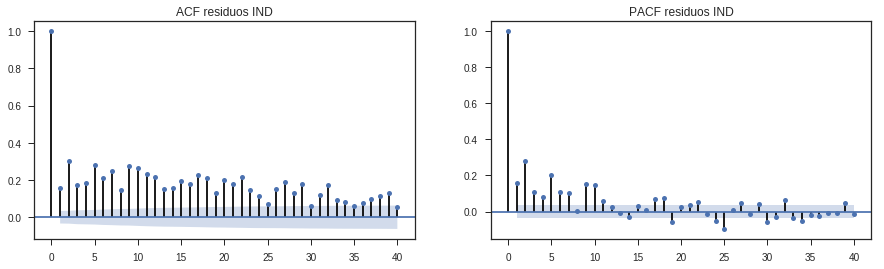

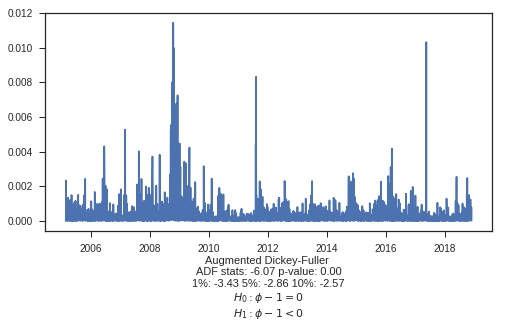

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos IND'))
plot_urq(res.resid**2)
resid_IND = res.resid

##### WIN

In [ ]:
plot_urq(df.WIN)
plot_urq(df_logreturn.WIN)
acf_pacf(df_logreturn.WIN)

In [ ]:
result_WIN = gridsearchARIMA(np.log(df.WIN), 4, 4)
result_WIN.iloc[:, :3]

In [ ]:
res = result_WIN.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'b', alpha=.5)
plt.plot(df.WIN, '--k', alpha=.8);

In [ ]:
print(res.summary())

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos WIN'))
norm_tests(res.resid)

In [ ]:
print(arch.unitroot.ADF(res.resid))
print(arch.unitroot.KPSS(res.resid))
print(arch.unitroot.PhillipsPerron(res.resid))

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos WIN'))
plot_urq(res.resid**2)
resid_WIN = res.resid

In [ ]:
print(arch.unitroot.ADF(res.resid**2))
print(arch.unitroot.KPSS(res.resid**2))
print(arch.unitroot.PhillipsPerron(res.resid**2))

#### Mensal

##### IBOV

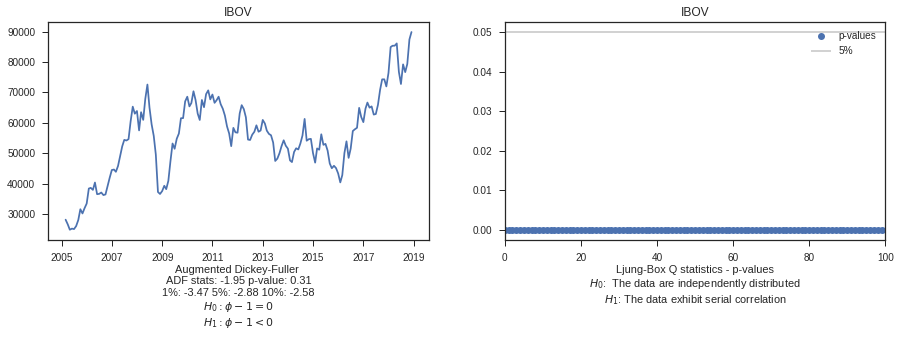

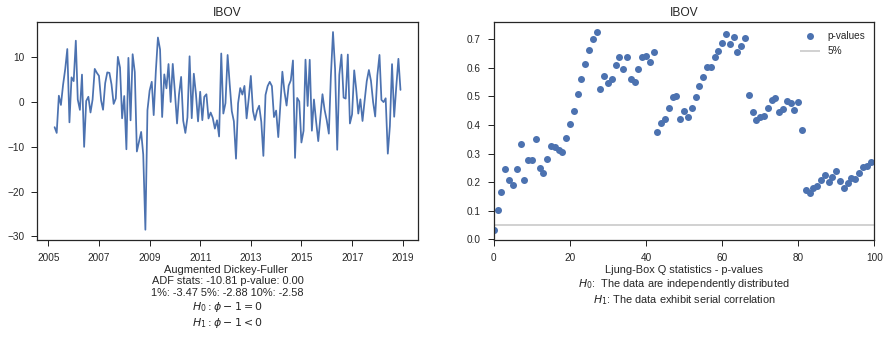

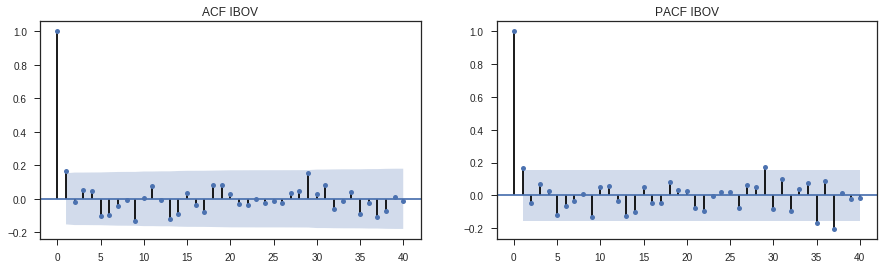

In [ ]:
plot_urq(df_month.IBOV)
plot_urq(df_logreturn_month.IBOV)
acf_pacf(df_logreturn_month.IBOV)

In [ ]:
result_IBOV_month = gridsearchARIMA(np.log(df_month.IBOV), 4, 4)
result_IBOV_month.iloc[:, :3]

,AIC,BIC,LogLikelihood
"ARIMA(0, 1, 1)",-434.925044,-425.607207,220.462522
"ARIMA(1, 1, 0)",-434.549734,-425.231897,220.274867
"ARIMA(3, 1, 2)",-433.989053,-412.247435,223.994527
"ARIMA(1, 1, 1)",-433.073825,-420.650043,220.536913
"ARIMA(0, 1, 2)",-433.053751,-420.629969,220.526876
"ARIMA(2, 1, 0)",-432.865235,-420.441453,220.432617
"ARIMA(3, 1, 3)",-432.053851,-407.206287,224.026925
"ARIMA(0, 1, 0)",-432.052475,-425.840584,218.026237
"ARIMA(3, 1, 0)",-431.610008,-416.080280,220.805004
"ARIMA(0, 1, 3)",-431.231814,-415.702086,220.615907


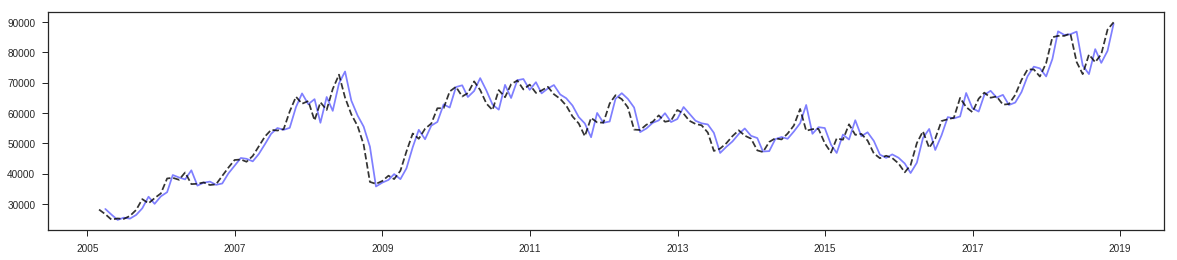

In [ ]:
res = result_IBOV_month.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'b', alpha=.5)
plt.plot(df_month.IBOV, '--k', alpha=.8);

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.IBOV   No. Observations:                  165
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 220.463
Method:                       css-mle   S.D. of innovations              0.064
Date:                Tue, 04 Dec 2018   AIC                           -434.925
Time:                        14:23:19   BIC                           -425.607
Sample:                    03-31-2005   HQIC                          -431.143
                         - 11-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0070      0.006      1.199      0.232      -0.004       0.018
ma.L1.D.IBOV     0.1784      0.079      2.255      0.025       0.023       0.333
                                    Roots   

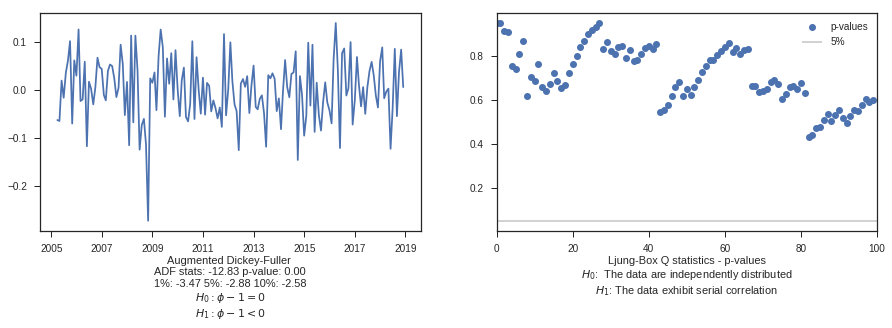

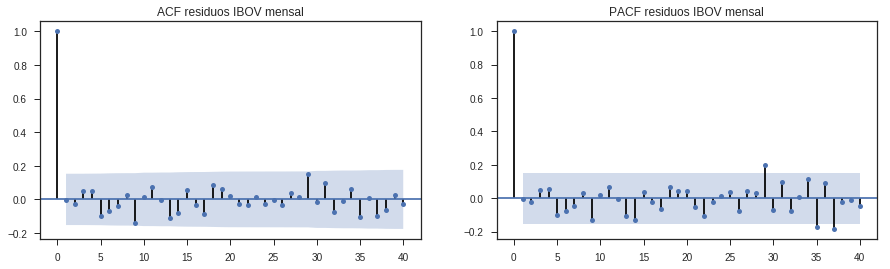

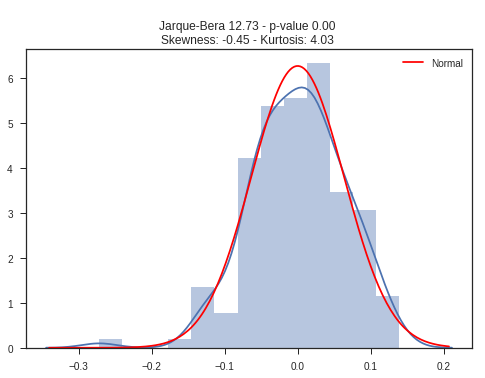

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos IBOV mensal'))
norm_tests(res.resid)

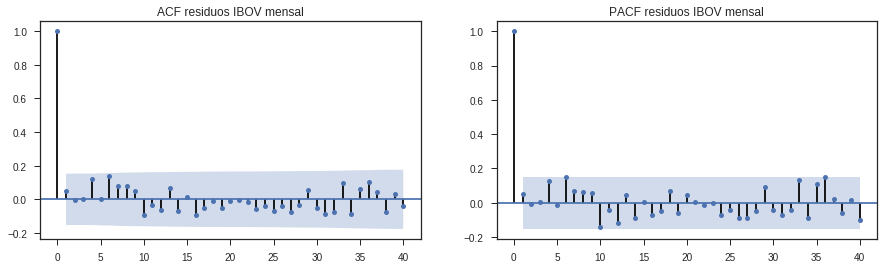

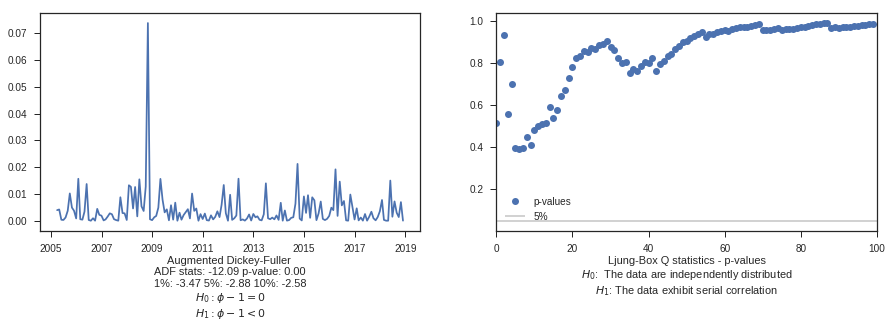

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos IBOV mensal'))
plot_urq(res.resid**2)
resid_IBOV_month = res.resid

##### IND

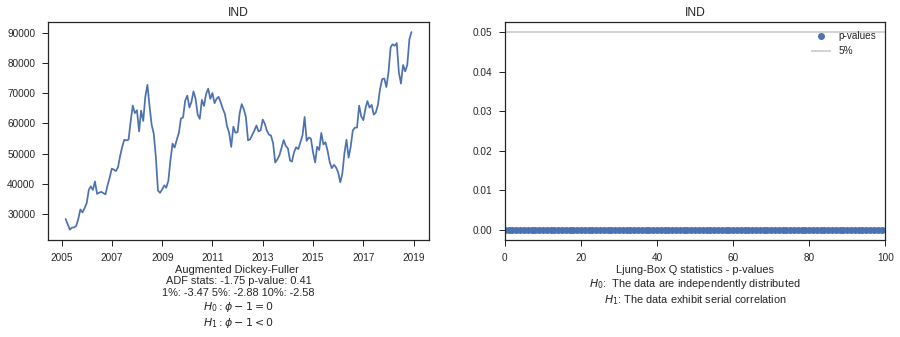

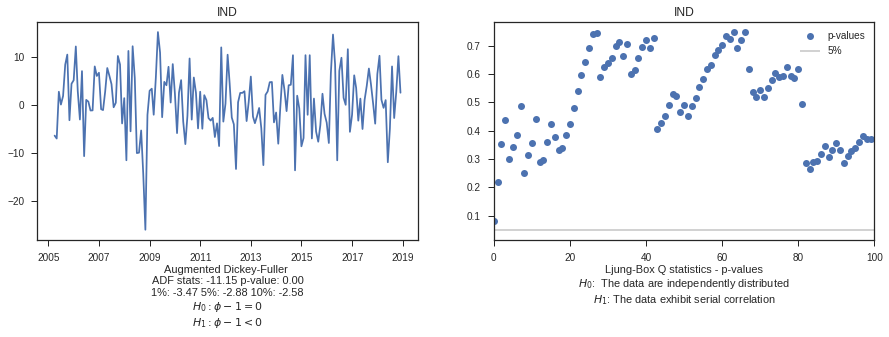

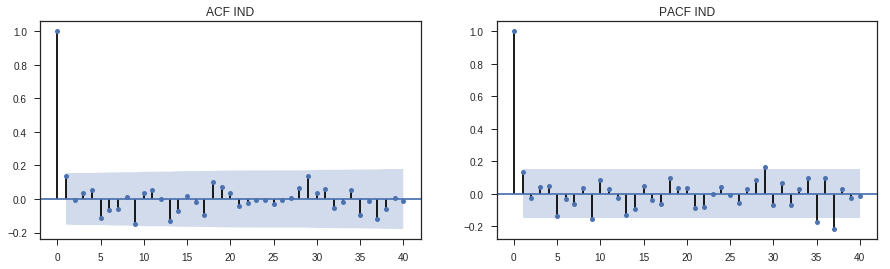

In [ ]:
plot_urq(df_month.IND)
plot_urq(df_logreturn_month.IND)
acf_pacf(df_logreturn_month.IND)

In [ ]:
result_IND_month = gridsearchARIMA(np.log(df_month.IND), 4, 4)
result_IND_month.iloc[:, :3]

,AIC,BIC,LogLikelihood
"ARIMA(0, 1, 1)",-427.877753,-418.559916,216.938876
"ARIMA(1, 1, 0)",-427.765752,-418.447915,216.882876
"ARIMA(0, 1, 0)",-426.738037,-420.526146,215.369019
"ARIMA(3, 1, 2)",-426.264084,-404.522466,220.132042
"ARIMA(1, 1, 1)",-425.893153,-413.469371,216.946576
"ARIMA(0, 1, 2)",-425.892323,-413.468541,216.946162
"ARIMA(2, 1, 0)",-425.857418,-413.433636,216.928709
"ARIMA(4, 1, 3)",-424.617814,-396.664305,221.308907
"ARIMA(4, 1, 2)",-424.264223,-399.416659,220.132111
"ARIMA(3, 1, 3)",-424.264200,-399.416636,220.132100


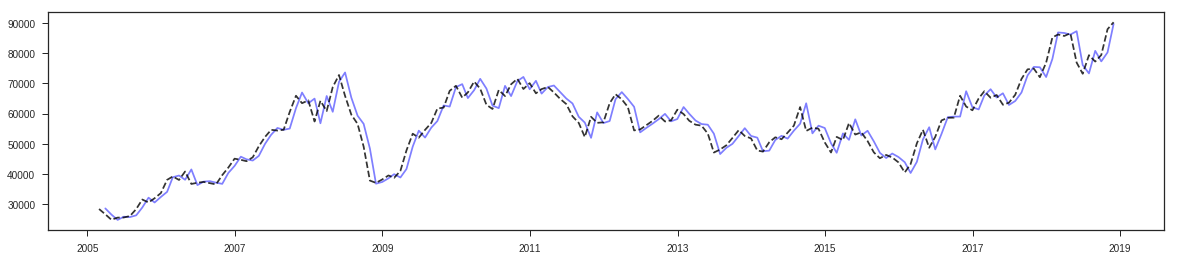

In [ ]:
res = result_IND_month.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'b', alpha=.5)
plt.plot(df_month.IND, '--k', alpha=.8);

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.IND   No. Observations:                  165
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 216.939
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 04 Dec 2018   AIC                           -427.878
Time:                        14:24:58   BIC                           -418.560
Sample:                    03-31-2005   HQIC                          -424.095
                         - 11-30-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0069      0.006      1.206      0.230      -0.004       0.018
ma.L1.D.IND     0.1400      0.078      1.800      0.074      -0.012       0.292
                                    Roots       

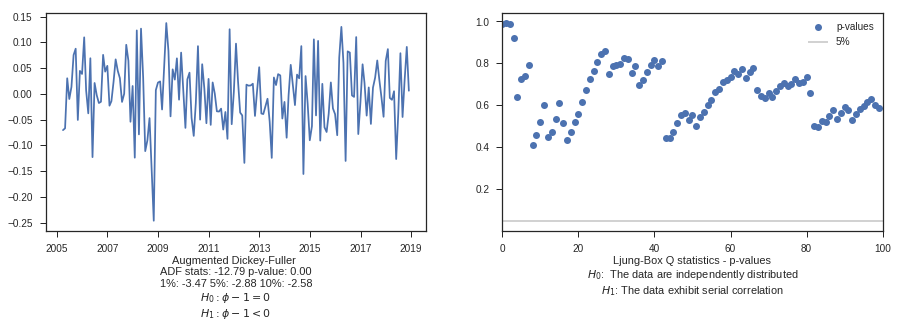

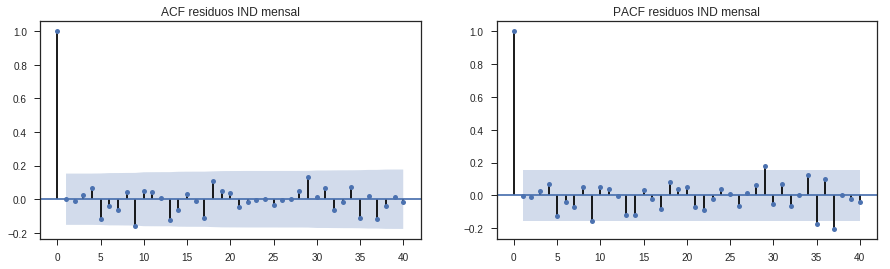

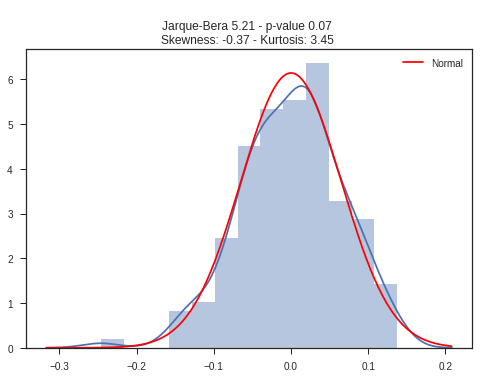

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos IND mensal'))
norm_tests(res.resid)

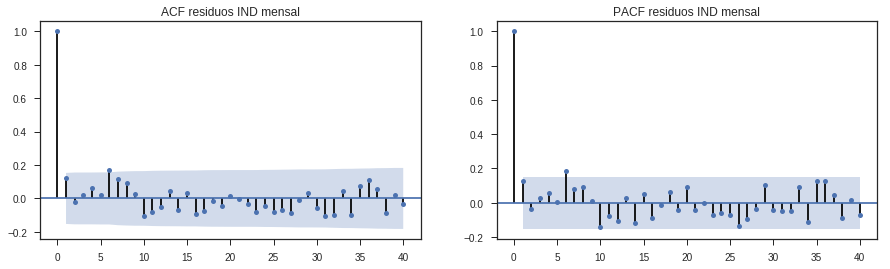

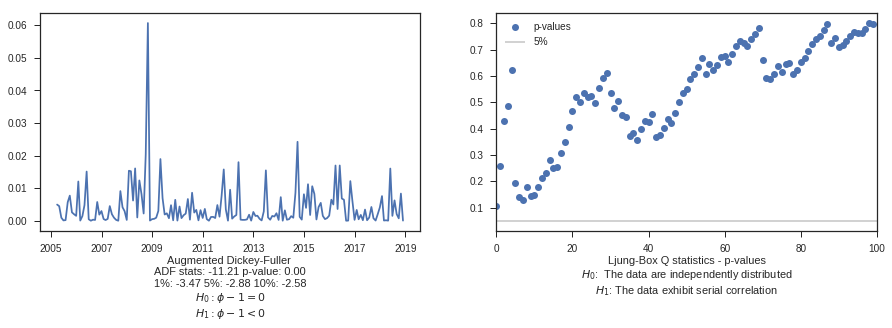

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos IND mensal'))
plot_urq(res.resid**2)
resid_IND_month = res.resid

##### WIN

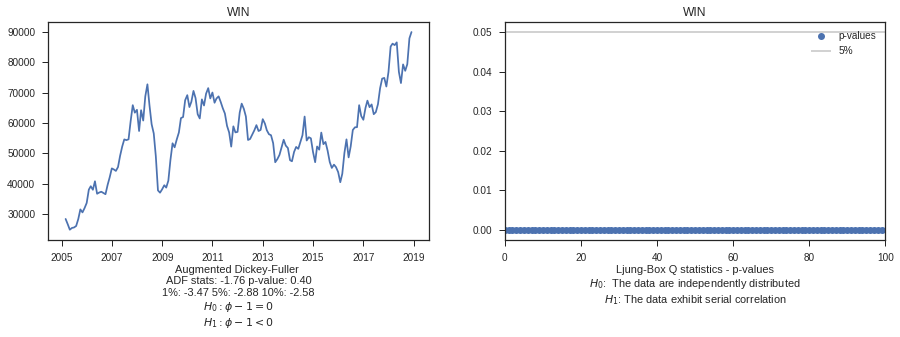

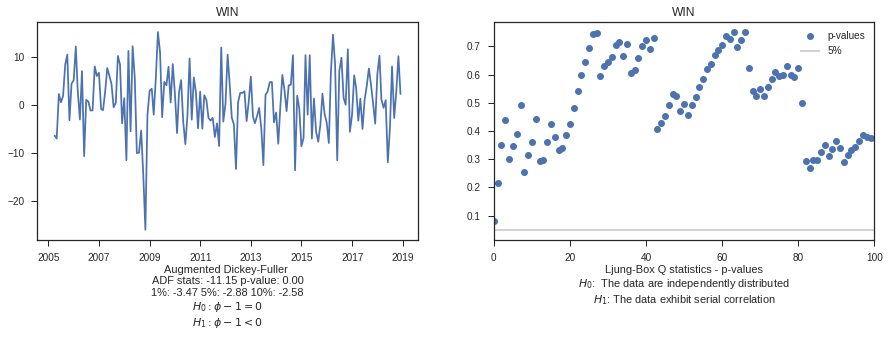

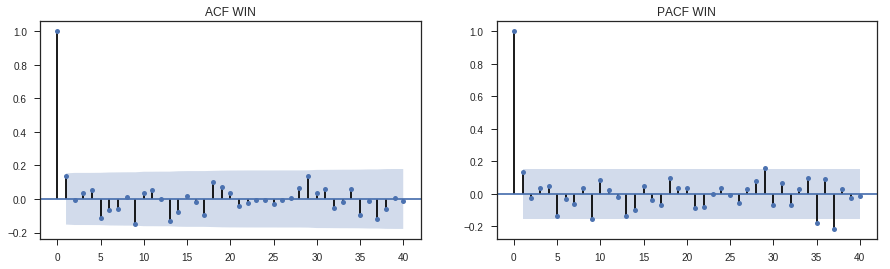

In [ ]:
plot_urq(df_month.WIN)
plot_urq(df_logreturn_month.WIN)
acf_pacf(df_logreturn_month.WIN)

In [ ]:
result_WIN_month = gridsearchARIMA(np.log(df_month.WIN), 4, 4)
result_WIN_month.iloc[:, :3]

,AIC,BIC,LogLikelihood
"ARIMA(0, 1, 1)",-427.965640,-418.647804,216.982820
"ARIMA(1, 1, 0)",-427.854254,-418.536418,216.927127
"ARIMA(0, 1, 0)",-426.807191,-420.595300,215.403596
"ARIMA(3, 1, 2)",-426.315865,-404.574247,220.157933
"ARIMA(1, 1, 1)",-425.980439,-413.556657,216.990220
"ARIMA(0, 1, 2)",-425.979575,-413.555793,216.989787
"ARIMA(2, 1, 0)",-425.944724,-413.520942,216.972362
"ARIMA(4, 1, 3)",-424.723733,-396.770223,221.361866
"ARIMA(4, 1, 2)",-424.316220,-399.468656,220.158110
"ARIMA(3, 1, 3)",-424.316160,-399.468596,220.158080


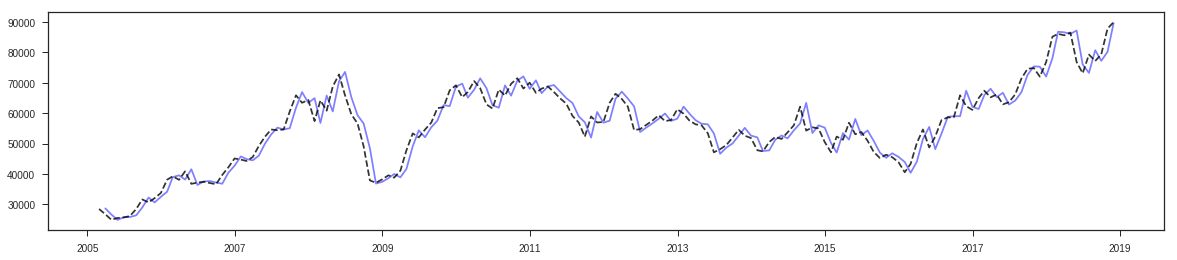

In [ ]:
res = result_WIN_month.iloc[0,3]
p = np.exp(res.predict(typ='levels'))
plt.figure(figsize=(20,4))
plt.plot(p, 'b', alpha=.5)
plt.plot(df_month.WIN, '--k', alpha=.8);

In [ ]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.WIN   No. Observations:                  165
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 216.983
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 04 Dec 2018   AIC                           -427.966
Time:                        14:27:47   BIC                           -418.648
Sample:                    03-31-2005   HQIC                          -424.183
                         - 11-30-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0069      0.006      1.203      0.231      -0.004       0.018
ma.L1.D.WIN     0.1404      0.078      1.805      0.073      -0.012       0.293
                                    Roots       

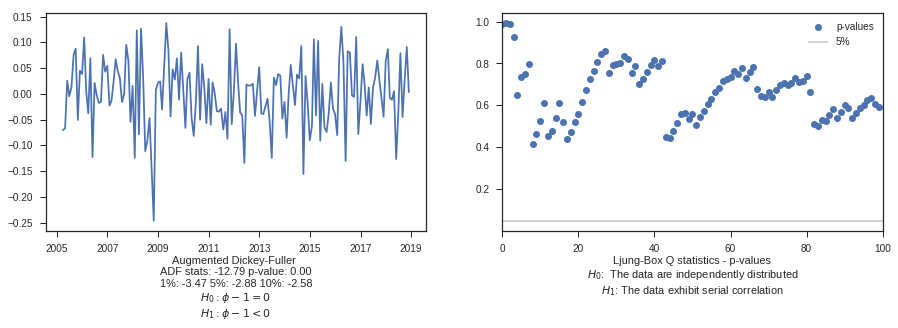

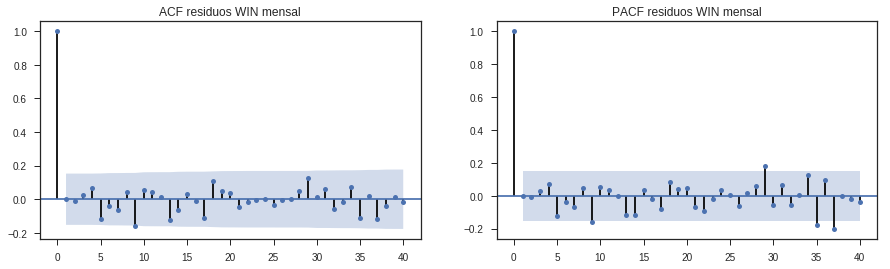

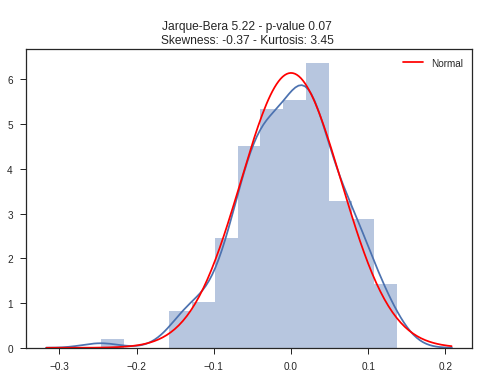

In [ ]:
plot_urq(res.resid)
acf_pacf(pd.Series(res.resid, name='residuos WIN mensal'))
norm_tests(res.resid)

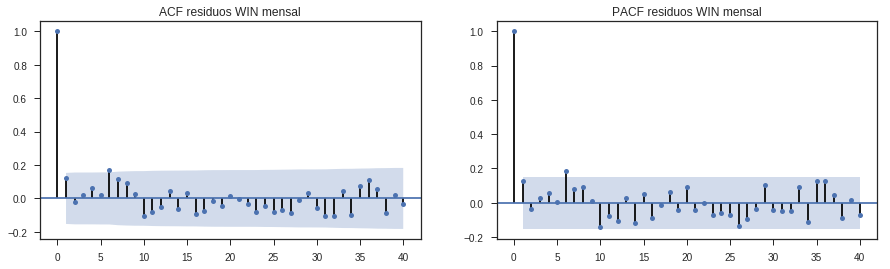

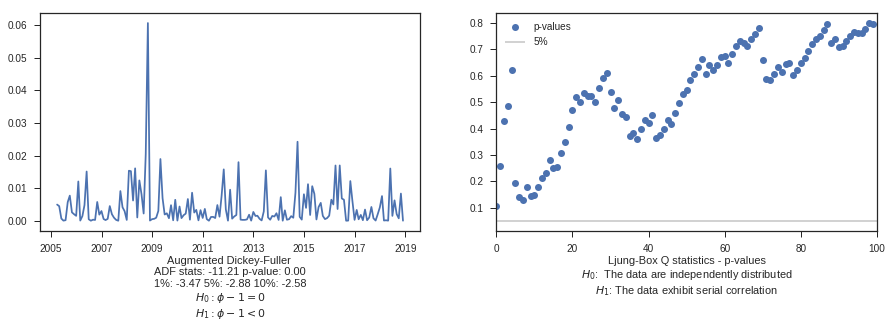

In [ ]:
acf_pacf(pd.Series(res.resid**2, name='residuos WIN mensal'))
plot_urq(res.resid**2)
resid_IND_month = res.resid

### Volatilidade Condicional

#### Diário

##### IBOV

In [ ]:
def gridsearchGARCH(series, p_max, q_max, dists = ['Normal', 'StudentsT']):
  results = pd.DataFrame()
  for p in range(1,p_max+1):
    for q in range(q_max+1):
      for dist in dists:
        try:
          mod = arch_model(series, vol='Garch', p=p, o=0, q=q, dist=dist)
          res = mod.fit(disp='off')
          model = str(res.model.volatility) + dist #'GARCH({},{}) dist = {}'.format(p,q, dist)
          results.loc[model, 'Dist'] = dist
          results.loc[model, 'AIC'] = res.aic
          results.loc[model, 'BIC'] = res.bic
          results.loc[model, 'LogLikelihood'] = res.loglikelihood
          results.loc[model, 'model'] = res
        except:
          pass #print('Erro no modelo GARCH({}, {}) dist = {}'.format(p,q, dist))
  return results.sort_values('AIC')


def gridsearchTARCH(series, p_max, q_max, dists = ['Normal', 'StudentsT']):
  results = pd.DataFrame()
  for p in range(1,p_max+1):
    for q in range(q_max+1):
      for dist in dists:
        try:
          mod = arch_model(series, vol='Garch', p=p, o=p, q=q, dist=dist, power=1)
          res = mod.fit(disp='off')
          model = str(res.model.volatility) + dist #'TARCH({},{}) dist = {}'.format(p,q, dist)
          results.loc[model, 'Dist'] = dist
          results.loc[model, 'AIC'] = res.aic
          results.loc[model, 'BIC'] = res.bic
          results.loc[model, 'LogLikelihood'] = res.loglikelihood
          results.loc[model, 'model'] = res
        except:
          pass #print('Erro no modelo GARCH({}, {}) dist = {}'.format(p,q, dist))
  return results.sort_values('AIC')

In [ ]:
result_garch = gridsearchGARCH(resid_IBOV * 100, 3, 3)
result_garch.iloc[:, :4]

,Dist,AIC,BIC,LogLikelihood
"GARCH(p: 2, q: 1)StudentsT",StudentsT,12470.727410,12507.495380,-6229.363705
"GARCH(p: 2, q: 2)StudentsT",StudentsT,12471.325269,12514.221235,-6228.662635
"GARCH(p: 2, q: 3)StudentsT",StudentsT,12472.368147,12521.392107,-6228.184074
"GARCH(p: 3, q: 1)StudentsT",StudentsT,12472.727409,12515.623375,-6229.363705
"GARCH(p: 3, q: 2)StudentsT",StudentsT,12473.325269,12522.349230,-6228.662635
"GARCH(p: 3, q: 3)StudentsT",StudentsT,12474.317605,12529.469561,-6228.158803
"GARCH(p: 1, q: 1)StudentsT",StudentsT,12477.710920,12508.350895,-6233.855460
"GARCH(p: 1, q: 2)StudentsT",StudentsT,12479.710920,12516.478890,-6233.855460
"GARCH(p: 1, q: 3)StudentsT",StudentsT,12481.710919,12524.606885,-6233.855460
"GARCH(p: 2, q: 2)Normal",Normal,12546.844914,12583.612884,-6267.422457


In [ ]:
res = result_garch.iloc[0, 4]
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                            GARCH   Log-Likelihood:               -6229.36
Distribution:      Standardized Student's t   AIC:                           12470.7
Method:                  Maximum Likelihood   BIC:                           12507.5
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3382
Time:                              16:59:00   Df Model:                            6
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

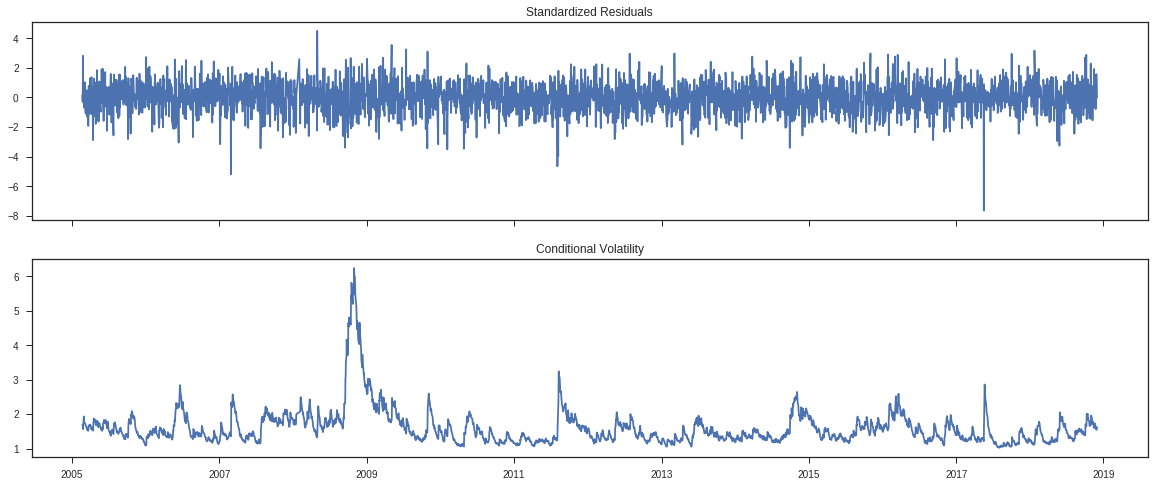

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)

Modelo TARCH

$\sigma_t  =  \omega + \alpha \left|\epsilon_{t-1}\right| + \gamma \left|\epsilon_{t-1}\right| I_{[\epsilon_{t-1}<0]}+ \beta \sigma_{t-1}$

In [ ]:
result_tarch = gridsearchTARCH(resid_IBOV * 100, 3, 3)
result_tarch

,Dist,AIC,BIC,LogLikelihood,model
"TARCH/ZARCH(p: 3, o: 3, q: 3)StudentsT",StudentsT,12432.487514,12506.023455,-6204.243757,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 1)StudentsT",StudentsT,12432.853352,12494.133302,-6206.426676,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 2)StudentsT",StudentsT,12434.536330,12501.944276,-6206.268165,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 3)StudentsT",StudentsT,12436.442531,12497.722482,-6208.221266,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 1)StudentsT",StudentsT,12439.324936,12488.348897,-6211.662468,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 2)StudentsT",StudentsT,12440.303573,12495.455528,-6211.151786,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 1)StudentsT",StudentsT,12447.946273,12484.714243,-6217.973136,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 2)StudentsT",StudentsT,12449.946549,12492.842515,-6217.973275,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 3)StudentsT",StudentsT,12451.907801,12500.931761,-6217.953900,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 3)Normal",Normal,12496.597741,12564.005687,-6237.298871,Constant Mean - TARCH/ZARCH ...


In [ ]:
res = result_tarch.iloc[0, 4]
print(res.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -6204.24
Distribution:      Standardized Student's t   AIC:                           12432.5
Method:                  Maximum Likelihood   BIC:                           12506.0
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3376
Time:                              16:59:14   Df Model:                           12
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

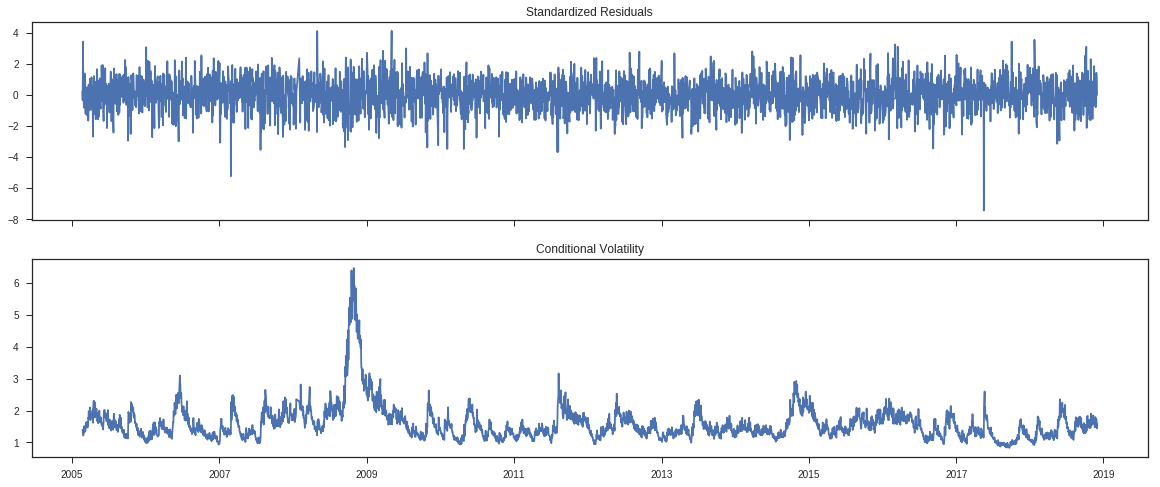

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)

##### IND

In [ ]:
result_garch = gridsearchGARCH(resid_IND * 100, 3, 3)
result_garch.iloc[:, :4]

,Dist,AIC,BIC,LogLikelihood
"GARCH(p: 2, q: 2)StudentsT",StudentsT,12686.753482,12729.649448,-6336.376741
"GARCH(p: 2, q: 3)StudentsT",StudentsT,12687.891738,12736.915698,-6335.945869
"GARCH(p: 3, q: 2)StudentsT",StudentsT,12688.753482,12737.777443,-6336.376741
"GARCH(p: 2, q: 1)StudentsT",StudentsT,12689.075559,12725.843529,-6338.537780
"GARCH(p: 3, q: 3)StudentsT",StudentsT,12689.891737,12745.043693,-6335.945869
"GARCH(p: 3, q: 1)StudentsT",StudentsT,12691.075559,12733.971524,-6338.537779
"GARCH(p: 1, q: 1)StudentsT",StudentsT,12693.702029,12724.342004,-6341.851015
"GARCH(p: 1, q: 2)StudentsT",StudentsT,12695.702029,12732.469999,-6341.851014
"GARCH(p: 1, q: 3)StudentsT",StudentsT,12697.702029,12740.597994,-6341.851014
"GARCH(p: 2, q: 2)Normal",Normal,12769.407396,12806.175366,-6378.703698


In [ ]:
res = result_garch.iloc[0, 4]
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                            GARCH   Log-Likelihood:               -6336.38
Distribution:      Standardized Student's t   AIC:                           12686.8
Method:                  Maximum Likelihood   BIC:                           12729.6
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3381
Time:                              16:59:26   Df Model:                            7
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

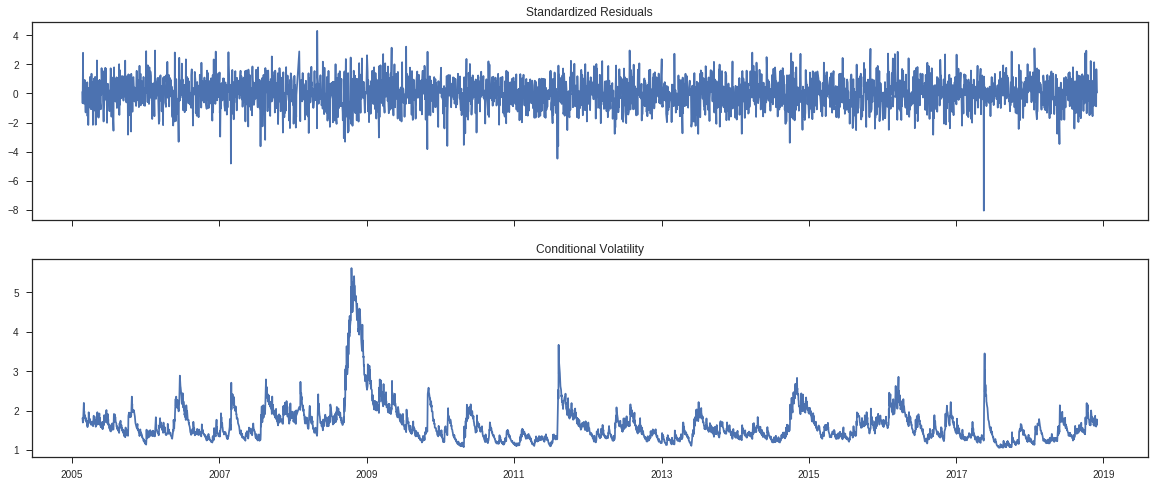

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)

Modelo TARCH

$\sigma_t  =  \omega + \alpha \left|\epsilon_{t-1}\right| + \gamma \left|\epsilon_{t-1}\right| I_{[\epsilon_{t-1}<0]}+ \beta \sigma_{t-1}$

In [ ]:
result_tarch = gridsearchTARCH(resid_IND * 100, 3, 3)
result_tarch

,Dist,AIC,BIC,LogLikelihood,model
"TARCH/ZARCH(p: 3, o: 3, q: 3)StudentsT",StudentsT,12637.272712,12710.808652,-6306.636356,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 3)StudentsT",StudentsT,12638.947105,12700.227056,-6309.473553,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 2)StudentsT",StudentsT,12641.624921,12709.032866,-6309.812460,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 1)StudentsT",StudentsT,12643.589340,12704.869291,-6311.794670,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 2)StudentsT",StudentsT,12644.231731,12699.383686,-6313.115865,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 1)StudentsT",StudentsT,12649.311936,12698.335897,-6316.655968,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 1)StudentsT",StudentsT,12654.923750,12691.691720,-6321.461875,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 2)StudentsT",StudentsT,12656.923750,12699.819715,-6321.461875,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 3)StudentsT",StudentsT,12658.647477,12707.671437,-6321.323738,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 3)Normal",Normal,12710.696138,12778.104084,-6344.348069,Constant Mean - TARCH/ZARCH ...


In [ ]:
res = result_tarch.iloc[0, 4]
print(res.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -6306.64
Distribution:      Standardized Student's t   AIC:                           12637.3
Method:                  Maximum Likelihood   BIC:                           12710.8
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3376
Time:                              16:59:42   Df Model:                           12
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

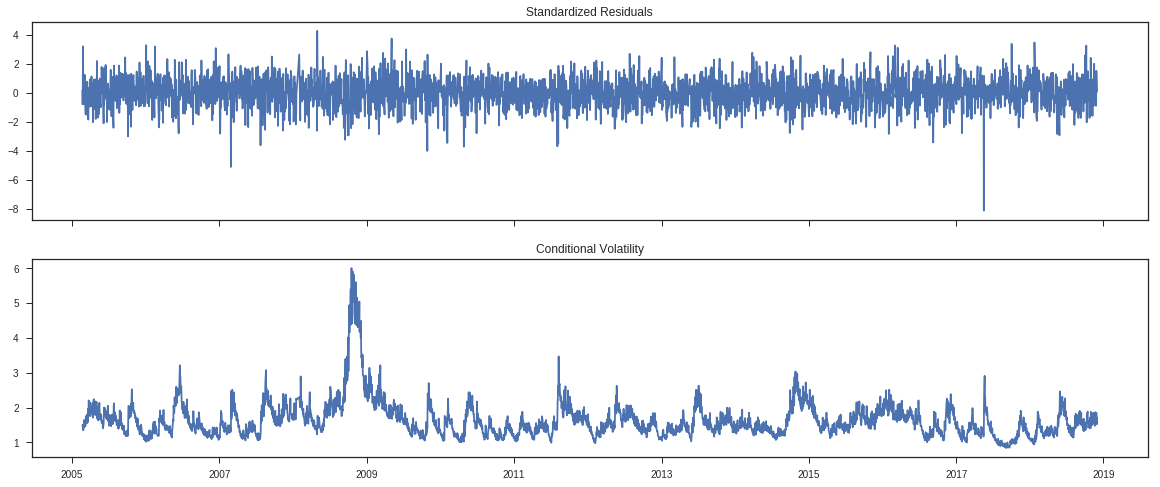

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)

##### WIN

In [ ]:
result_garch = gridsearchGARCH(resid_WIN * 100, 3, 3)
result_garch.iloc[:, :4]

,Dist,AIC,BIC,LogLikelihood
"GARCH(p: 2, q: 2)StudentsT",StudentsT,12700.193456,12743.089421,-6343.096728
"GARCH(p: 2, q: 3)StudentsT",StudentsT,12700.599229,12749.623189,-6342.299614
"GARCH(p: 2, q: 1)StudentsT",StudentsT,12701.665006,12738.432977,-6344.832503
"GARCH(p: 3, q: 2)StudentsT",StudentsT,12702.193456,12751.217416,-6343.096728
"GARCH(p: 3, q: 3)StudentsT",StudentsT,12702.599229,12757.751184,-6342.299614
"GARCH(p: 3, q: 1)StudentsT",StudentsT,12703.665006,12746.560972,-6344.832503
"GARCH(p: 1, q: 1)StudentsT",StudentsT,12706.041392,12736.681367,-6348.020696
"GARCH(p: 1, q: 2)StudentsT",StudentsT,12708.041391,12744.809362,-6348.020696
"GARCH(p: 1, q: 3)StudentsT",StudentsT,12710.041391,12752.937357,-6348.020696
"GARCH(p: 2, q: 3)Normal",Normal,12781.070121,12823.966086,-6383.535061


In [ ]:
res = result_garch.iloc[0, 4]
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                            GARCH   Log-Likelihood:               -6343.10
Distribution:      Standardized Student's t   AIC:                           12700.2
Method:                  Maximum Likelihood   BIC:                           12743.1
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3381
Time:                              16:59:57   Df Model:                            7
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

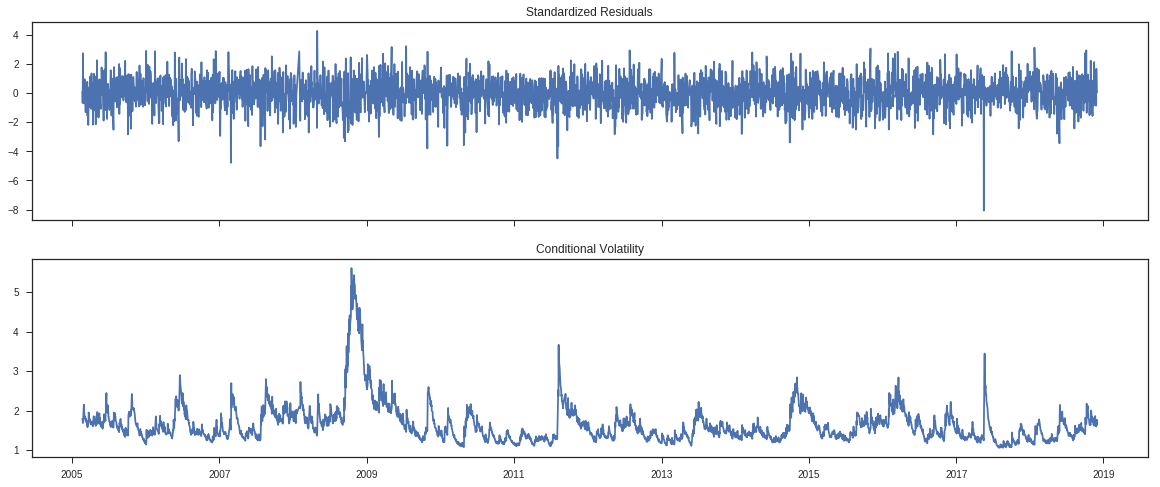

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)

Modelo TARCH

$\sigma_t  =  \omega + \alpha \left|\epsilon_{t-1}\right| + \gamma \left|\epsilon_{t-1}\right| I_{[\epsilon_{t-1}<0]}+ \beta \sigma_{t-1}$

In [ ]:
result_tarch = gridsearchTARCH(resid_WIN * 100, 3, 3)
result_tarch

,Dist,AIC,BIC,LogLikelihood,model
"TARCH/ZARCH(p: 3, o: 3, q: 3)StudentsT",StudentsT,12651.469752,12725.005692,-6313.734876,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 3)StudentsT",StudentsT,12653.320756,12714.600706,-6316.660378,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 2)StudentsT",StudentsT,12656.046847,12723.454792,-6317.023423,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 1)StudentsT",StudentsT,12657.409931,12718.689882,-6318.704966,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 2)StudentsT",StudentsT,12659.078633,12714.230589,-6320.539317,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 2, o: 2, q: 1)StudentsT",StudentsT,12662.862729,12711.886689,-6323.431364,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 1)StudentsT",StudentsT,12668.487815,12705.255785,-6328.243907,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 2)StudentsT",StudentsT,12670.487815,12713.383780,-6328.243907,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 1, o: 1, q: 3)StudentsT",StudentsT,12672.280332,12721.304293,-6328.140166,Constant Mean - TARCH/ZAR...
"TARCH/ZARCH(p: 3, o: 3, q: 3)Normal",Normal,12723.116830,12790.524775,-6350.558415,Constant Mean - TARCH/ZARCH ...


In [ ]:
res = result_tarch.iloc[0, 4]
print(res.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -6313.73
Distribution:      Standardized Student's t   AIC:                           12651.5
Method:                  Maximum Likelihood   BIC:                           12725.0
                                              No. Observations:                 3388
Date:                      Tue, Dec 04 2018   Df Residuals:                     3376
Time:                              17:00:13   Df Model:                           12
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

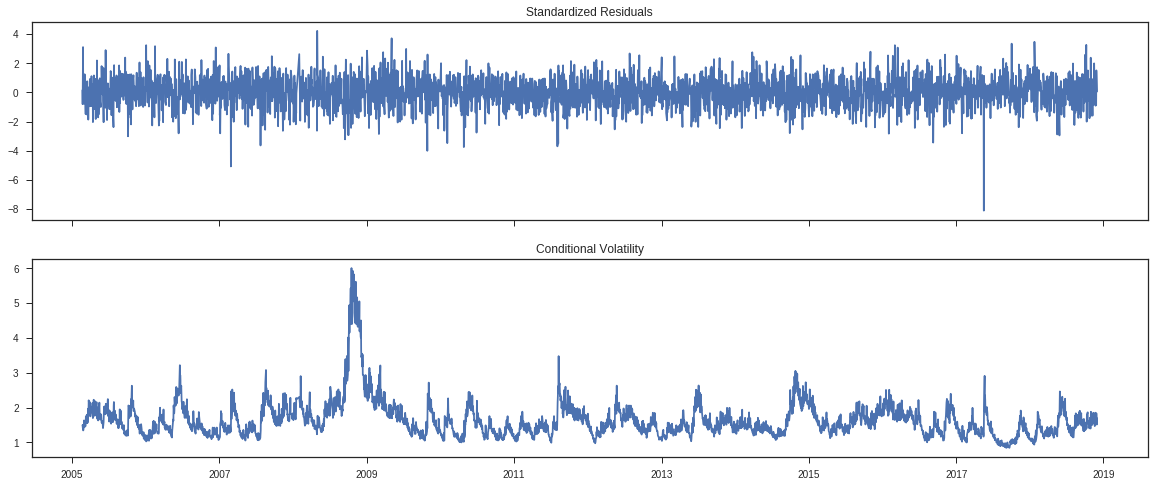

In [ ]:
fig = res.plot()
fig.set_size_inches(20,8)